After examining the two data files, I can see that the data can be considered as time series. Since the goal of this task is to generate similar time series or sequences, my first choice would be seq-to-seq models or transformers.

Informer and Autoformer from the Hugging Face library would be good solutions. They perform well for time series forecasting.

Another quick solution would be RealTabformer, a transformer model designed for synthetic tabular data generation. If I transform the JSON data into a pandas DataFrame and use the model to generate similar synthetic data, and then transform the data back to JSON, it should work.

Due to limited memory and time constraints, I will train the RealTabformer model using only one file since it requires less RAM and GPU resources, making it easier to train and use.

# Importing data


In [49]:
# Import the json module to work with JSON data
import json

# Open the first JSON file for reading and load its contents into the variable 'match1'
with open('/content/drive/MyDrive/footbar_usecase/match_1.json') as json_file:
    match1 = json.load(json_file)

# Open the second JSON file for reading and load its contents into the variable 'match2'
with open('/content/drive/MyDrive/footbar_usecase/match_2.json') as json_file:
    match2 = json.load(json_file)

In [94]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Create a DataFrame from the data in 'match1' using pandas and store it in 'df'
df = pd.DataFrame.from_dict(match1)

# Display the first few rows of the DataFrame
df.head()

,label,norm
0,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."


# Data preparation and EDA

In [95]:
# Calculate the length of the 'norm' column in the DataFrame 'df' and create a new column 'Length' to store the results
df['Length'] = df['norm'].str.len()

In [96]:
# Find the maximum length value in the 'Length' column
df['Length'].max()

227

In [97]:
# Find the minimum length value in the 'Length' column
df['Length'].min()

1

<Axes: xlabel='Length', ylabel='label'>

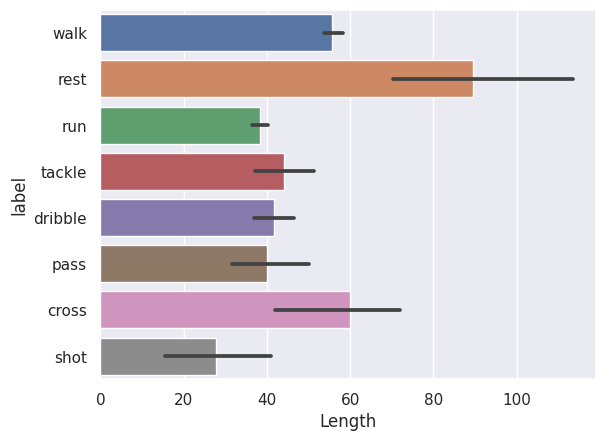

In [98]:
# Import the required libraries for the EDA part
import seaborn as sns  # Import seaborn for data visualization

# Set the style for seaborn plots
sns.set()

# Create a bar plot using seaborn to visualize and compare the length of list of time serie for each action
sns.barplot(data=df, x="Length", y="label")

We can see here that the time series associated with the rest action are the longest. While the time series associated with the shot shot are the shortest.

In [99]:
# Pad the lists with zeroes to make them of uniform size
df['norm'] = df['norm'].apply(lambda x: x + [0] * (df['Length'].max() - len(x)))
# check if it worked (Find the minimum length value in the 'Length' column)
df['Length'] = df['norm'].str.len()
df['Length'].min()

227

In [100]:
# Expand the lists into separate columns
df = pd.concat([df, df['norm'].apply(pd.Series)], axis=1)

# Drop the original 'norm' column
df = df.drop('norm', axis=1)

# Print the resulting DataFrame
df

,label,Length,0,1,2,3,4,5,6,7,...,217,218,219,220,221,222,223,224,225,226
0,walk,227,23.177037,23.361525,21.535253,23.400315,23.007525,22.927317,23.143662,22.916891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,walk,227,20.998214,19.182798,18.272491,19.690260,20.830143,18.688537,19.612758,18.163000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,walk,227,21.952597,20.627205,22.555408,20.016869,20.381994,21.571995,20.039704,19.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,walk,227,19.392097,19.304607,18.978771,22.324970,21.747552,19.331224,19.102857,19.690260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,rest,227,22.069263,19.672270,19.882150,21.101266,20.078084,20.936662,20.492237,19.416972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,walk,227,21.245737,21.938836,21.245737,21.088881,21.245737,20.306248,19.372493,20.825239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570,walk,227,20.272348,21.820303,21.211776,20.638558,21.522611,22.289184,25.214965,27.084998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,run,227,90.213060,72.127128,63.564388,70.379536,60.210597,100.630808,95.541994,100.285597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572,tackle,227,44.795103,27.264069,88.616417,60.052678,85.664416,50.453319,72.651169,77.462347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# comparing time taken for each movement/action in seconds :
df['time'] = df.drop(['label',"Length"],axis=1).sum(axis=0)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='label', ylabel='time'>

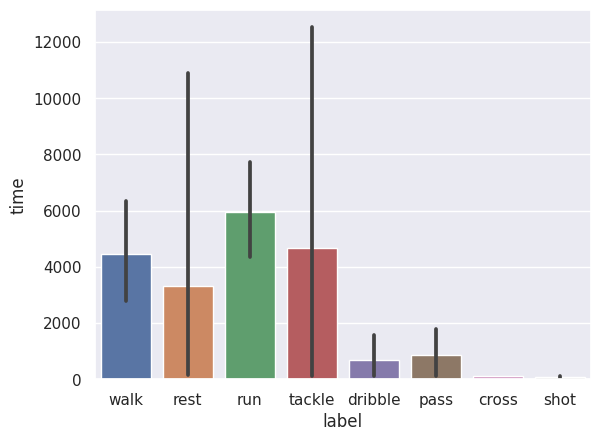

In [102]:
sns.set()
sns.barplot(data=df, x="label", y="time")

The "cross" action takes the least time while the "tackle" action takes the most.

In [51]:
# Import necessary modules from sklearn for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Initialize a LabelEncoder object
le = preprocessing.LabelEncoder()

# Use the LabelEncoder to transform the 'label' column in the DataFrame 'df'
df['label'] = le.fit_transform(df['label'])

# Create a dictionary that maps original class names to their encoded values
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping of class names to their encoded values
print(le_name_mapping)


{'cross': 0, 'dribble': 1, 'pass': 2, 'rest': 3, 'run': 4, 'shot': 5, 'tackle': 6, 'walk': 7}


In this part, I limited the players' movement length to 100 instead of 227 due to memory limitations. This should not be done if you have sufficient GPU and RAM. In optimal conditions I would use the second data file with movements of lengths = 700 .

In [ ]:
for i in range(100,227):
    df.drop(i, axis=1, inplace=True)

In [10]:
# transform the column names type to string ( this is needed for the realtabformer)
df.columns = df.columns.map(str)

# Modeling



<center>
    <h1>REaLTabFormer</h1>
    <br>
    <div align="center" style="width:70%;">
        <p style="font-size: 1.2em; text-align:justify">The REaLTabFormer (Realistic Relational and Tabular Data using Transformers) offers a unified framework for synthesizing tabular data of different types. A sequence-to-sequence (Seq2Seq) model is used for generating synthetic relational datasets. The REaLTabFormer model for a non-relational tabular data uses GPT-2, and can be used out-of-the-box to model any tabular data with independent observations.</p>
    </div>
    <br>
    
<div align="center" style="width:70%;">
    <img src="https://github.com/avsolatorio/RealTabFormer/raw/main/img/REalTabFormer_Final_EQ.png" style="width:50%"/>
 </div>  
    <p align="center">
    <strong>REaLTabFormer: Generating Realistic Relational and Tabular Data using Transformers</strong>
<div align="center" style="width:70%;">           
    <a href="https://arxiv.org/abs/2302.02041">Paper on ArXiv</a>
    </p>

</div>
</center>

In [11]:
# install realtabformer package
!pip install realtabformer -q

In [12]:
#Import necessary modules

from realtabformer import REaLTabFormer
from realtabformer import rtf_validators as rtf_val
from transformers import logging as hf_logging

## Set Hugging Face Transformers logging verbosity to error level
hf_logging.set_verbosity_error()


# Initialize a REaLTabFormer model with specific configurations
rtf_model = REaLTabFormer(
    model_type="tabular",  # Specify the model type as "tabular"
    batch_size=6,  # Set batch size to 6
    epochs=5,  # Specify the number of training epochs
    gradient_accumulation_steps=2,  # Set gradient accumulation steps
    logging_steps=5  # Specify logging steps during training
)

In [13]:
hf_logging.set_verbosity_error()
# fit the model to our tabular data and train it
rtf_model.fit(df, num_bootstrap=5)

Computing the sensitivity threshold...


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:568: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:595: UserWarning: qt_interval adjusted from 100 to 4...
  warnings.warn(


Bootstrap round:   0%|          | 0/5 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    5.000000
mean     0.002553
std      0.016649
min     -0.020745
25%     -0.009574
50%      0.013830
75%      0.014362
max      0.014894
dtype: float64
Sensitivity threshold: 0.01478723404255319 qt_max: 0.05


Map:   0%|          | 0/574 [00:00<?, ? examples/s]

{'loss': 8.0645, 'learning_rate': 4.8958333333333335e-05, 'epoch': 0.1}
{'loss': 6.3309, 'learning_rate': 4.791666666666667e-05, 'epoch': 0.21}
{'loss': 5.2158, 'learning_rate': 4.6875e-05, 'epoch': 0.31}
{'loss': 4.5618, 'learning_rate': 4.5833333333333334e-05, 'epoch': 0.42}
{'loss': 3.8392, 'learning_rate': 4.4791666666666673e-05, 'epoch': 0.52}
{'loss': 3.5569, 'learning_rate': 4.375e-05, 'epoch': 0.62}
{'loss': 3.3463, 'learning_rate': 4.270833333333333e-05, 'epoch': 0.73}
{'loss': 3.0923, 'learning_rate': 4.166666666666667e-05, 'epoch': 0.83}
{'loss': 2.7813, 'learning_rate': 4.0625000000000005e-05, 'epoch': 0.94}
{'loss': 2.586, 'learning_rate': 3.958333333333333e-05, 'epoch': 1.04}
{'loss': 2.6301, 'learning_rate': 3.854166666666667e-05, 'epoch': 1.15}
{'loss': 2.5208, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.25}
{'loss': 2.2734, 'learning_rate': 3.6458333333333336e-05, 'epoch': 1.35}
{'loss': 2.4187, 'learning_rate': 3.541666666666667e-05, 'epoch': 1.46}
{'loss': 2.

  0%|          | 0/282 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 384 samples generated. Sampling efficiency is: 100.0000%
Critic round: 5,                     sensitivity_threshold: 0.01478723404255319,                         val_sensitivity: -0.019680851063829788,                             val_sensitivities: [-0.025, -0.023404255319148935, -0.02021276595744681, -0.017553191489361703, -0.019680851063829788, -0.020744680851063832, -0.025, -0.01702127659574468, -0.01595744680851064, -0.017553191489361703, -0.018085106382978722, -0.013829787234042554, -0.019680851063829788, -0.018617021276595744, -0.022872340425531913]


# Results

In [14]:
# Create an instance of the ObservationValidator from realtabformer
obs_validator = rtf_val.ObservationValidator()

# Set Hugging Face Transformers logging verbosity to error level
hf_logging.set_verbosity_error()

# Generate samples using the REaLTabFormer model
# - n_samples: Number of samples to generate (200 in this case)
# - gen_batch: Batch size for generating samples (5 in this case)
# - validator: Use the ObservationValidator for validation
samples_validated = rtf_model.sample(
    n_samples=200,
    gen_batch=6,
    validator=obs_validator)

  0%|          | 0/200 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 204 samples generated. Sampling efficiency is: 100.0000%


In [15]:
# print the number of samples generated
samples_validated

,label,Length,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,7,227,21.2969,35.2275,20.1318,20.2016,29.5200,43.5913,19.9030,19.7687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,227,20.2679,24.7269,19.4050,10.8832,37.4629,21.4949,20.4562,20.1418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,227,19.8422,10.0606,10.3122,20.3482,51.3864,20.9580,26.2592,21.2417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,227,20.2955,21.0448,24.5500,20.0983,13.8300,13.9962,20.3590,20.0429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,227,20.0570,23.5488,22.3883,19.3620,19.4099,28.9962,30.5029,32.6480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7,227,37.2530,40.1448,21.0308,25.2099,20.2665,47.1510,48.0020,19.4366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,7,227,34.9088,20.1635,20.5491,20.3043,29.3903,20.7999,29.7009,22.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,4,227,41.5419,20.4372,19.9943,30.3399,52.5723,43.0777,28.4742,20.3766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,7,227,20.0433,23.0873,30.4465,20.3101,21.9328,20.6146,21.6024,24.4737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
samples_validated['label'].unique()

array([7, 4, 3, 2, 1])

# Generate a fixed length sequence :

In [34]:
# Define a function named 'generate' that takes 'match_length' as a parameter
def generate(match_length):
    # Convert 'match_length' from minutes to seconds
    match_length_in_secs = float(match_length * 60)

    # Generate an initial sample using the REaLTabFormer model
    samples_validated = rtf_model.sample(
        n_samples=1, gen_batch=1,
        validator=obs_validator,
    )

    # Continue generating samples until the total duration is at least 'match_length_in_secs'
    while samples_validated.drop('label', axis=1).sum(axis=1).sum(axis=0) < match_length_in_secs:
        # Generate additional samples and concatenate them to 'samples_validated'
        samples_validated = pd.concat([samples_validated, rtf_model.sample(n_samples=1, gen_batch=1, validator=obs_validator)], ignore_index=True)

    # Return the generated samples
    return samples_validated


In [40]:
# generate a 60 mins long sample
match_mins_60=generate(60)

  0%|          | 0/1 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1 samples generated. Sampling efficiency is: 100.0000%


  0%|          | 0/1 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1 samples generated. Sampling efficiency is: 100.0000%


  0%|          | 0/1 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1 samples generated. Sampling efficiency is: 100.0000%


In [43]:
# checking if the length is correct:
match_mins_60.drop('label',axis=1).sum(axis = 1).sum(axis = 0)//60

64.0

In [46]:
# checking2 (20 mins):
match_mins_15=generate(20)
match_mins_15.drop('label',axis=1).sum(axis = 1).sum(axis = 0)//60

  0%|          | 0/1 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1 samples generated. Sampling efficiency is: 100.0000%


20.0

# Restoring the original data format

In [17]:
# Define a function named 'rest_data' that takes 'samples_validated' as a parameter
def rest_data(samples_validated):
    # Create an empty DataFrame named 'generated_df'
    generated_df = pd.DataFrame()

    # Inverse transform the 'label' column to its original values using the LabelEncoder 'le'
    generated_df['label'] = le.inverse_transform(samples_validated['label'])

    # Drop the 'label' column from 'samples_validated' and store the restof the data  in 't'
    t = samples_validated.drop('label', axis=1)

    # Convert the remaining columns in 't' to a list and store it in 'generated_df' under 'norm'
    generated_df['norm'] = t.values.tolist()

    # Remove any values of 0 and 100.0 from the 'norm' column in 'generated_df'
    generated_df['norm'] = generated_df['norm'].apply(lambda lst: [x for x in lst if x != 0 and x != 100.0])

    # Convert 'generated_df' to a list of dictionaries (records)
    generated_data = generated_df.to_dict('records')

    # Return the generated data
    return generated_data


In [18]:
# apply the 'rest_data' function to 'samples_validated'
generated_data = rest_data(samples_validated)

# Display the results
generated_data

[{'label': 'walk',
  'norm': [227.0,
   21.2969,
   35.2275,
   20.1318,
   20.2016,
   29.52,
   43.5913,
   19.903,
   19.7687,
   21.08,
   19.4605,
   30.8676,
   19.579,
   20.7255,
   20.9991,
   28.8036,
   20.686,
   28.4762,
   22.3436,
   20.641,
   39.0884,
   20.67,
   21.2486,
   24.666,
   24.3392,
   0.0961,
   33.2626,
   16.3,
   26.2722,
   25.9637,
   27.112,
   29.412,
   27.7418,
   13.6,
   23.5349,
   0.0093,
   28.0,
   25.0,
   37.0,
   0.5,
   20.0,
   10.0,
   21.0]},
 {'label': 'walk',
  'norm': [227.0,
   20.2679,
   24.7269,
   19.405,
   10.8832,
   37.4629,
   21.4949,
   20.4562,
   20.1418,
   30.6593,
   23.588,
   29.5002,
   33.2976,
   22.2604,
   32.1187,
   36.3099,
   21.0033,
   25.4341,
   20.3814,
   27.38,
   23.4086,
   32.2856,
   10.7261,
   20.4688,
   20.6509,
   43.8832,
   22.8548,
   22.24,
   33.363,
   18.2541,
   35.0,
   25.4383,
   19.7596,
   0.1,
   0.1642,
   21.0,
   33.0,
   39.0,
   15.0,
   0.6821,
   25.0,
   30.0,
   27

# Save model

In [47]:
rtf_model.save("rtf_model/")

Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: last-epoch-model
